<a href="https://colab.research.google.com/github/lanpty58/mystudy/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset_path = ''
df = pd.read_csv(dataset_path, index_col = 'PassengerId')



In [2]:
df.describe()
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]


In [3]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis = 1)
print(X_b.shape)

(891, 9)


In [22]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(X_b, y, test_size = val_size, random_state = random_state, shuffle = is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size= test_size, random_state = random_state, shuffle = is_shuffle)


In [23]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:,1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:]= normalizer.transform(X_test[:, 1:])
print(X_train.shape, X_val.shape)


(623, 9) (179, 9)


In [53]:
def sigmoid(z):
  return 1/ (1+ np.exp(-z))

def predict(X, theta):
  dot_product = np.dot(X, theta)
  y_hat = sigmoid(dot_product)
  return y_hat

def compute_loss(y_hat, y):
  y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
  return (-y*np.log(y_hat) - (1-y)*np.log(1-y_hat)).mean()

def compute_gradient(X, y, y_hat):
  return np.dot(X.T, y_hat - y)/y.size

def update_theta(theta, gradient, lr):
    return theta - lr*gradient

def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta).round()
  acc = (y == y_hat).mean()
  return acc

In [54]:
lr = 0.01
epochs = 100
batch_size = 16
np.random.seed(random_state)
theta = np.random.uniform(size = X_train.shape[1])
theta

array([0.4359949 , 0.02592623, 0.54966248, 0.43532239, 0.4203678 ,
       0.33033482, 0.20464863, 0.61927097, 0.29965467])

In [57]:
train_losses = []
train_accs = []
val_losses = []
val_accs = []

for epoch in range(epochs):
  train_batch_losses = []
  train_batch_accs = []
  val_batch_losses = []
  val_batch_accs = []

  for i in range(0, X_train.shape[0], batch_size):
    X_i = X_train[i: i+batch_size]
    y_i = y_train[i:i+batch_size]
    y_hat = predict(X_i, theta)
    gradient = compute_gradient(X_i, y_i, y_hat)
    theta = update_theta(theta, gradient, lr)

    y_h = predict(X_train, theta)
    train_loss = compute_loss(y_h, y_train)
    train_batch_losses.append(train_loss.item())

    train_acc = compute_accuracy(X_train, y_train, theta)
    train_batch_accs.append(train_acc.item())

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss.item())

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc.item())

  train_batch_loss = sum(train_batch_losses)/len(train_batch_losses)
  val_batch_loss = sum(val_batch_losses)/len(val_batch_losses)
  train_batch_acc = sum(train_batch_accs)/len(train_batch_accs)
  val_batch_acc = sum(val_batch_accs)/len(val_batch_accs)

  train_losses.append(train_batch_loss)
  train_accs.append(train_batch_acc)
  val_losses.append(val_batch_loss)
  val_accs.append(val_batch_acc)

  print(f'\nEPOCH {epoch +1}: \t Traing loss: {train_batch_loss: .3f} \t Validation loss : {val_batch_loss: .3f}  \t train acc : {train_batch_acc: .3f}')


EPOCH 1: 	 Traing loss:  0.412 	 Validation loss :  0.519  	 train acc :  0.817

EPOCH 2: 	 Traing loss:  0.412 	 Validation loss :  0.519  	 train acc :  0.817

EPOCH 3: 	 Traing loss:  0.412 	 Validation loss :  0.520  	 train acc :  0.817

EPOCH 4: 	 Traing loss:  0.412 	 Validation loss :  0.520  	 train acc :  0.817

EPOCH 5: 	 Traing loss:  0.412 	 Validation loss :  0.520  	 train acc :  0.817

EPOCH 6: 	 Traing loss:  0.412 	 Validation loss :  0.520  	 train acc :  0.817

EPOCH 7: 	 Traing loss:  0.412 	 Validation loss :  0.520  	 train acc :  0.817

EPOCH 8: 	 Traing loss:  0.412 	 Validation loss :  0.520  	 train acc :  0.817

EPOCH 9: 	 Traing loss:  0.412 	 Validation loss :  0.520  	 train acc :  0.817

EPOCH 10: 	 Traing loss:  0.412 	 Validation loss :  0.520  	 train acc :  0.817

EPOCH 11: 	 Traing loss:  0.411 	 Validation loss :  0.520  	 train acc :  0.817

EPOCH 12: 	 Traing loss:  0.411 	 Validation loss :  0.520  	 train acc :  0.817

EPOCH 13: 	 Traing loss:

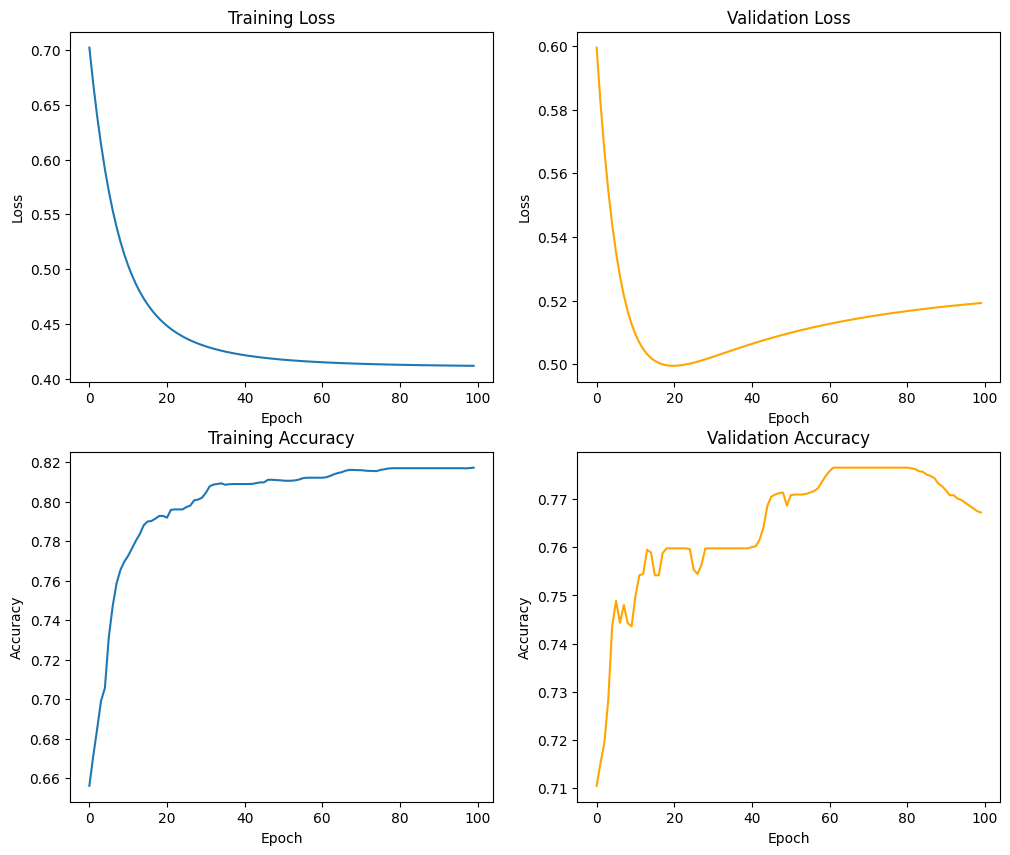

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize = (12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel = 'Epoch', ylabel = 'Loss')
ax[0, 0].set_title('Training Loss')
ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel = 'Epoch', ylabel = 'Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel = 'Epoch', ylabel = 'Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel = 'Epoch', ylabel = 'Accuracy')
ax[1, 1].set_title('Validation Accuracy')
plt.show()